## Domain-Retail
focus – Visualize the sales data<br>
### Business challenge/requirement

BigMart is one of the biggest retailer of Europe and has operations across multiple countries. You are a data analyst in IT team of BigMart. Invoice and SKU wise Sales Data for Year 2011 is shared with you. You need to prepare meaningful charts to show case the various sales trends for 2011 to top management.


### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Plot Total Sales Per Month for Year 2011. How the total sales have increased over months in Year 2011. Which month has lowest Sales?

In [2]:
# Reading the data
df = pd.read_csv("datasets/BigMartSalesData.csv")

df #displaying the data

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,01-12-10,1,12,2010,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,01-12-10,1,12,2010,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,01-12-10,1,12,2010,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541869,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,09-12-11,9,12,2011,12680.0,France
541870,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,09-12-11,9,12,2011,12680.0,France
541871,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France
541872,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,09-12-11,9,12,2011,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB


### Sales for year 2021 by month.

In [4]:
sales_2011 = df[df['Year']==2011]
sales_2011_month = sales_2011.groupby('Month').sum()['Amount']
sales_2011_month

Month
1      822669.640
2      549134.460
3      752003.310
4      582318.451
5      817655.200
6      832231.670
7      757108.941
8      791173.020
9     1097467.722
10    1239237.260
11    1557236.410
12     843909.020
Name: Amount, dtype: float64

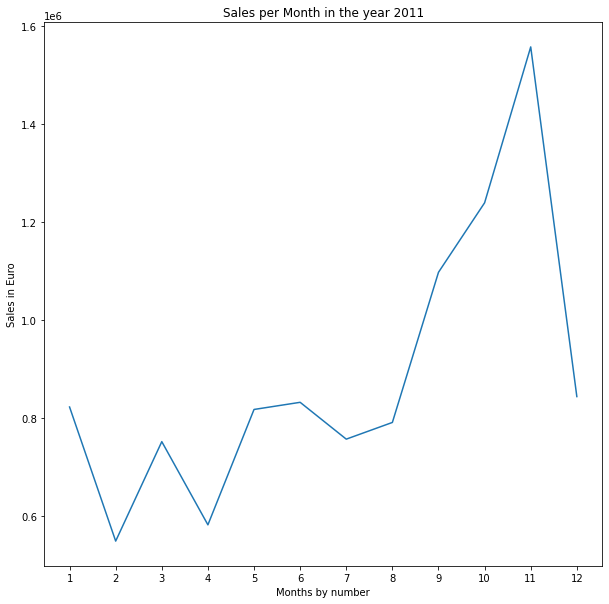

In [5]:
plt.figure(figsize=(10,10))
plt.plot(sales_2011_month.index, sales_2011_month.values)
plt.xlabel("Months by number")
plt.ylabel("Sales in Euro")
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12))
plt.title("Sales per Month in the year 2011")
plt.show()

In [6]:
plt.savefig("figures/2011_sales_per_month.jpg",dpi=100)     #Saving the above figure

<Figure size 432x288 with 0 Axes>

The 2nd month i.e. February had the lowest sales in the year 2011.

---

### 2. Plot Total Sales Per Month for Year 2011 as Bar Chart. Is Bar Chart Better to visualize than Simple Plot?

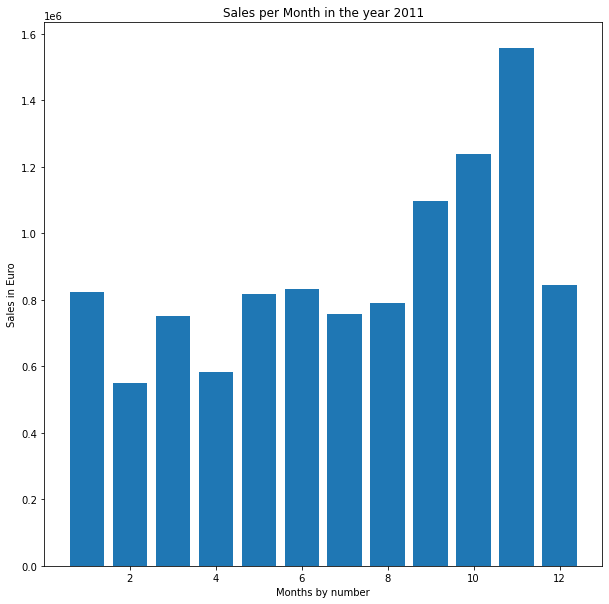

In [13]:
plt.figure(figsize=(10,10))
plt.bar(sales_2011_month.index, sales_2011_month.values)
plt.xlabel("Months by number")
plt.ylabel("Sales in Euro")
plt.title("Sales per Month in the year 2011")
plt.show()

---

**In this case, the bar charts are not able to visualize better than Simple Plot.**

### 3. Plot Pie Chart for Year 2011 Country Wise. Which Country contributes highest towards sales?

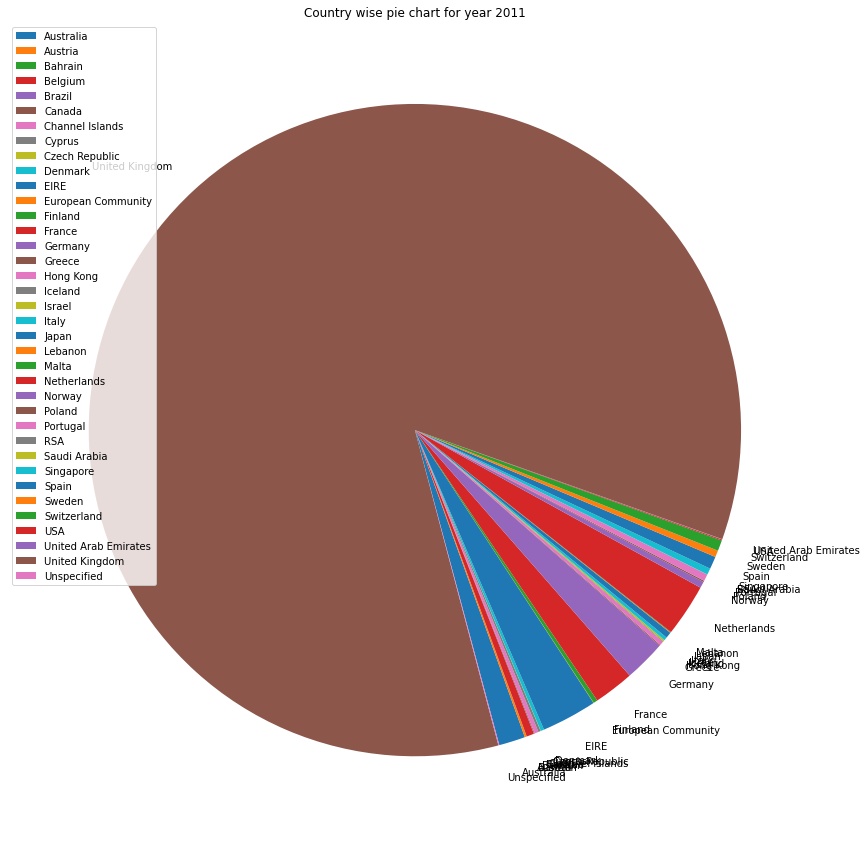

In [20]:
sales_per_country = sales_2011.groupby('Country').sum()['Amount']
plt.figure(figsize = (15,15))
plt.title("Country wise pie chart for year 2011")
plt.pie(sales_per_country.values, labels=sales_per_country.index,startangle=-75)
plt.legend()

**United Kingdom Contributes highest towards sales.**

---

### 4. Plot Scatter Plot for the invoice amounts and see the concentration of amount. In which range most of the invoice amounts are concentrated.

In [9]:
sales_by_invoice = sales_2011.groupby('InvoiceNo').sum()['Amount']
sales_by_invoice

InvoiceNo
539993        307.30
539994          0.00
539995          0.00
539996          0.00
539997          0.00
             ...    
C581484    168469.60
C581490        32.53
C581499       224.69
C581568        54.75
C581569         7.50
Name: Amount, Length: 23872, dtype: float64

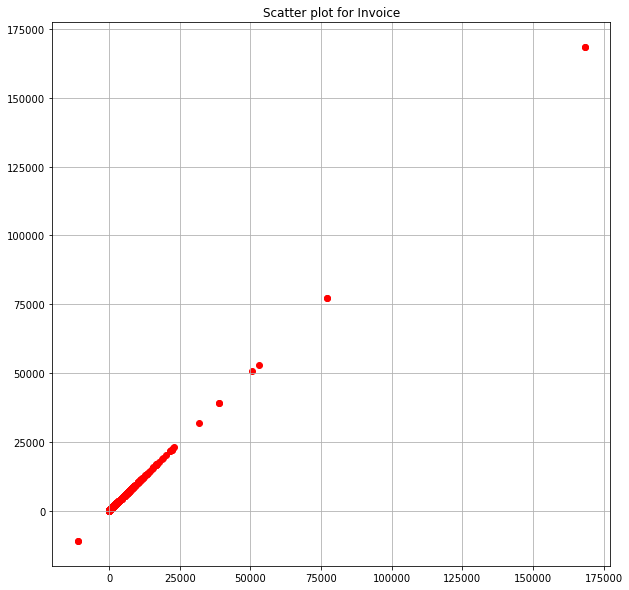

In [29]:
plt.figure(figsize = (10,10))
plt.title("Scatter plot for Invoice")
plt.scatter(sales_by_invoice.values, sales_by_invoice.values,color='red')
plt.grid(True)
plt.show()

**Most of the sales are concentrated between 0 to 25000.**

---